### Lab 6

### Temperature prediction for New York City

The steps outlined for this lab are as follows:
- 1. Import the dependencies
- 2. load the required data
- 3. Exploratory analysis of the data
- 4. Perform scaling on the numerical feature
- 5. split the data into train test split.
- 6. Model building. Build 3 different Models
- 7. Visualize the training process
- 8. Evaluate the performance of the model
- 9. Make predictions on unseen data

###  Import all the dependencies needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

2024-11-05 16:33:14.004523: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Read the temperature data

In [2]:
df = pd.read_csv("/Users/macbookpro/Desktop/neural_nets/lab_6/data/temperature.csv")

### Explore the data and familiarize with it's structure. 


Check some basic statistics about the data

In [3]:
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          44458 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      44460 non-null  float64
 4   Seattle            45250 non-null  float64
 5   Los Angeles        45250 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45252 non-null  float64
 8   Phoenix            45250 non-null  float64
 9   Albuquerque        45252 non-null  float64
 10  Denver             45252 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45249 non-null  float64
 13  Houston            45250 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45240 non-null  float64
 16  Saint Louis        452

In [5]:
df.columns

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem'],
      dtype='object')

### For this case, i prefer to do the temperature prediction of new york city

In [6]:
df_new_york =  df[['datetime', 'New York']]

In [7]:
df_new_york.head()

,datetime,New York
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,288.220000
2,2012-10-01 14:00:00,288.247676
3,2012-10-01 15:00:00,288.326940
4,2012-10-01 16:00:00,288.406203


In [8]:
df_new_york.describe()

,New York
count,44460.000000
mean,285.400406
std,10.220932
min,250.774000
25%,277.370000
50%,285.870000
75%,293.760000
max,310.240000


In [9]:
#  check for missing values
df_new_york.isna().sum()

datetime      0
New York    793
dtype: int64

In [10]:
# drop missing values
df_new_york.dropna(inplace=True)

/var/folders/y5/5kc5fqvn2tncnl_868zg4zhr0000gn/T/ipykernel_34519/2833522633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_york.dropna(inplace=True)


### Scaling

In [11]:
data =  df_new_york['New York'].values
scaler = MinMaxScaler(feature_range=(0,1))
data =  data.reshape(-1, 1)
data = scaler.fit_transform(data).flatten()

In [13]:
# Prepare dataset for RNN (using past 30 days to predict the next day)
def get_XY(data, window):
    Y_index = np.arange(window, len(data), window)
    Y = data[Y_index]
    rows_x = len(Y)
    X = data[range(window*rows_x)]
    X = np.reshape(X, (rows_x, window, 1)) 
    return X, Y

In [14]:
look_back = 30
X, y = get_XY(data, window=look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for RNN input


### Split it into two sets. One for training and the other for testing

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size = 0.2,
 random_state = 0)

###  Model Building stage

Here We will build 3 models, each individually on the same dataset, then we will plot the training process and evaluate each model's performance

###  First Model to build is the RNN

In [16]:
# Model 1: Simple RNN
model_rnn = Sequential([
    SimpleRNN(50, input_shape=(look_back, 1)),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
history_rnn = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


/Users/macbookpro/Desktop/neural_nets/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0658 - val_loss: 0.0051
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - val_loss: 0.0026
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - val_loss: 8.7438e-04
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.1157e-04 - val_loss: 7.6615e-04
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7808e-04 - val_loss: 0.0010
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.3621e-04 - val_loss: 8.0461e-04
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9343e-04 - val_loss: 8.8636e-04
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3837e-04 - val_loss: 7.2804e-04


### The  Second model to build is the LSTM model

In [17]:
# Model 2: LSTM 
model_lstm = Sequential([
    LSTM(50, input_shape=(look_back, 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0927 - val_loss: 0.0080
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - val_loss: 0.0023


### The third model to build is the Stacked LSTM model

In [18]:
# Model 3: Stacked LSTM or Stacked GRU
model_stacked_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(50),
    Dense(1)
])
model_stacked_lstm.compile(optimizer='adam', loss='mean_squared_error')
history_gru = model_stacked_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1525 - val_loss: 0.0059
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0049 - val_loss: 0.0039
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0034 - val_loss: 0.0032


### Measure the performance of our model during training

###  For the Simple RNN

we take the training history and plot the process of the training vs the epoch.

We should expect the loss to be reducing as we progressively move through various epochs. That should show that our model is actually learning something


In [19]:
loss_rnn = history_rnn.history['loss']
val_loss_rnn = history_rnn.history['val_loss']
epochs = range(1, len(loss_rnn) + 1)

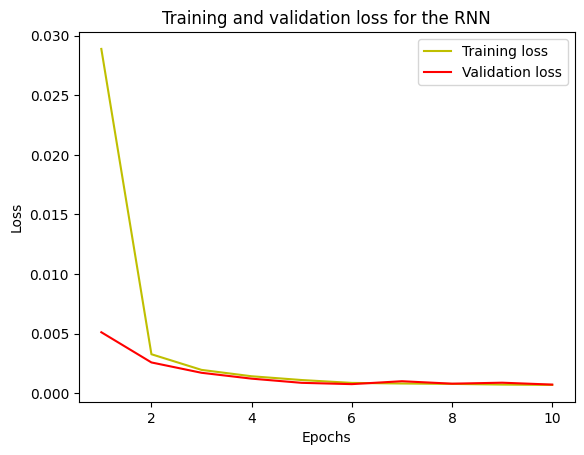

In [20]:
plt.plot(epochs, loss_rnn, 'y', label='Training loss')
plt.plot(epochs, val_loss_rnn, 'r', label='Validation loss')
plt.title('Training and validation loss for the RNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
def print_error(trainY, testY, train_predict, test_predict): 
    # Error of predictions
    mae = (mean_absolute_error(trainY, train_predict))
    mse = (mean_squared_error(trainY, train_predict))
    # Print RMSE
    print('train MAE: %.10f' % (mae))
    print('train MSE: %.10f' % (mse)) 
    
    # Error of predictions
    mae = (mean_absolute_error(testY, test_predict))
    mse = (mean_squared_error(testY, test_predict))
    # Print RMSE
    print('test MAE: %.10f' % (mae))
    print('test MSE: %.10f' % (mse)) 
    # make predictions
train_predict = model_rnn.predict(X_train)
test_predict = model_rnn.predict(X_test)
print_error(y_train, y_test, train_predict, test_predict)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
train MAE: 0.0217909704
train MSE: 0.0007819150
test MAE: 0.0228454571
test MSE: 0.0008486418


###  For the LSTM

In [22]:
loss_lstm = history_lstm.history['loss']
val_loss_lstm = history_lstm.history['val_loss']
epochs = range(1, len(loss_lstm) + 1)

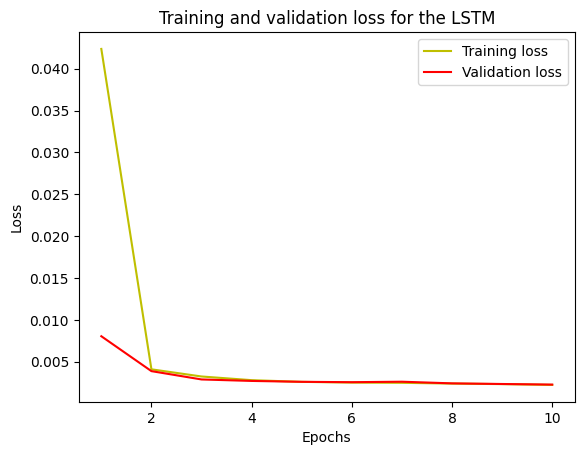

In [23]:
plt.plot(epochs, loss_lstm, 'y', label='Training loss')
plt.plot(epochs, val_loss_lstm, 'r', label='Validation loss')
plt.title('Training and validation loss for the LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
train_predict = model_lstm.predict(X_train)
test_predict = model_lstm.predict(X_test)
print_error(y_train, y_test, train_predict, test_predict)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
train MAE: 0.0387302709
train MSE: 0.0021814103
test MAE: 0.0392890398
test MSE: 0.0023351627


### Stacked LSTM model

In [25]:
loss_gru = history_gru.history['loss']
val_loss_gru = history_gru.history['val_loss']
epochs = range(1, len(loss_gru) + 1)

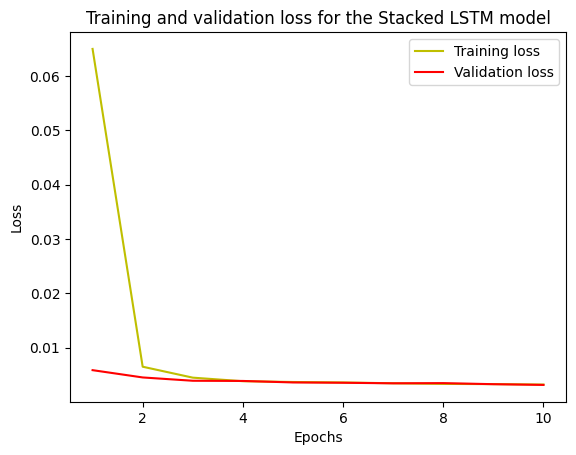

In [29]:
plt.plot(epochs, loss_gru, 'y', label='Training loss')
plt.plot(epochs, val_loss_gru, 'r', label='Validation loss')
plt.title('Training and validation loss for the Stacked LSTM model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
train_predict = model_stacked_lstm.predict(X_train)
test_predict = model_stacked_lstm.predict(X_test)
print_error(y_train, y_test, train_predict, test_predict)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
train MAE: 0.0451485666
train MSE: 0.0031109618
test MAE: 0.0448009260
test MSE: 0.0032933165


###  Prediction Time

Time to make predictions on unseen data. Let's see if our model can generalize well on unseen data

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


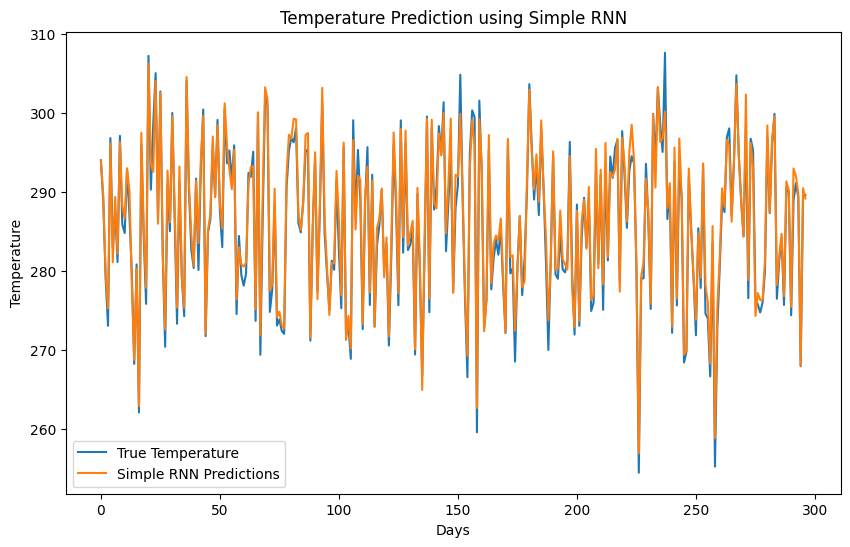

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


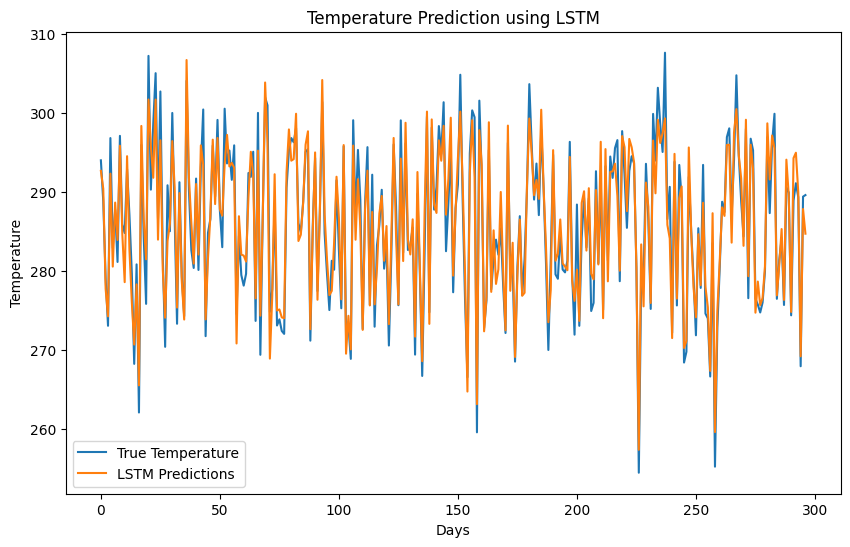

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


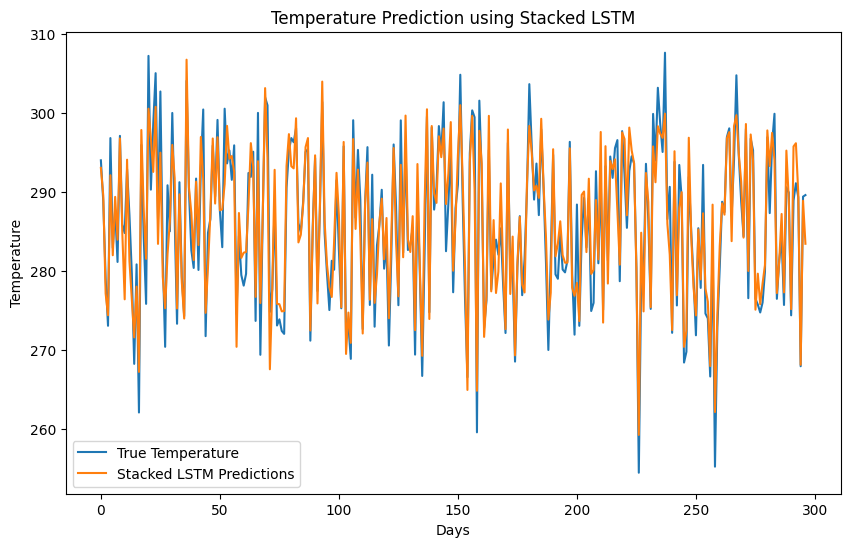

In [28]:
# Evaluate models and plot predictions
models = {'Simple RNN': model_rnn, 'LSTM': model_lstm, 'Stacked LSTM': model_stacked_lstm}
for name, model in models.items():
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)  # Inverse scale
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse scale
    
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label='True Temperature')
    plt.plot(predictions, label=f'{name} Predictions')
    plt.title(f'Temperature Prediction using {name}')
    plt.xlabel('Days')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()

### Conclusion

From the analysis of the work done, we can see that the best result came from the Simple RNN.

The Simple RNN had the least errors when compared with the other models.

Also it is important to note that the models generalized well on unseen data. we didn't have a problem of overfitting in the process